In [4]:
# visualize
# remove oulier dùng boxplot
# nomalize dùng standarn
# feature selection dùng remove low variace
# linear trgresion
# chứng minh biến đổi tuyến tính chứng minh output có thể áp dụng liner từ fat dựa vào phổ, mô hình hóa lên xem các biến trong phố có nghịch hay thuận vs fat mới biết được nó có linear đươc ko

# Tính phổ và lấy fat

In [5]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv("data_table.csv")
# df[["trans_dark"]]
trans = [f'Trans_Dark_{i}' for i in range(1, 257)]
trans_data = df[trans].to_numpy()

white = [f'Trans_White_{i}' for i in range(1, 257)]
white_data = df[white].to_numpy()

Sample = [f'Trans_Sample_{i}' for i in range(1, 257)]
sample_data = df[Sample].to_numpy()

# white_data
pho = (sample_data-trans_data)/(white_data-trans_data)
pho

fat = df['Fat']
fat


0       2.79
1       4.70
2       3.35
3       2.69
4       4.60
        ... 
1219    3.59
1220    4.02
1221    3.40
1222    3.44
1223    3.18
Name: Fat, Length: 1224, dtype: float64

# Visualize line plot for phổ

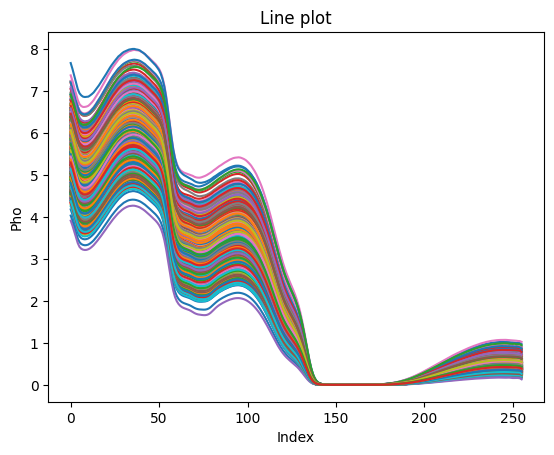

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

for row in pho:
    plt.plot(row) 

plt.title('Line plot')
plt.xlabel('Index')
plt.ylabel('Pho')
plt.show()


# visualize histogram for fat

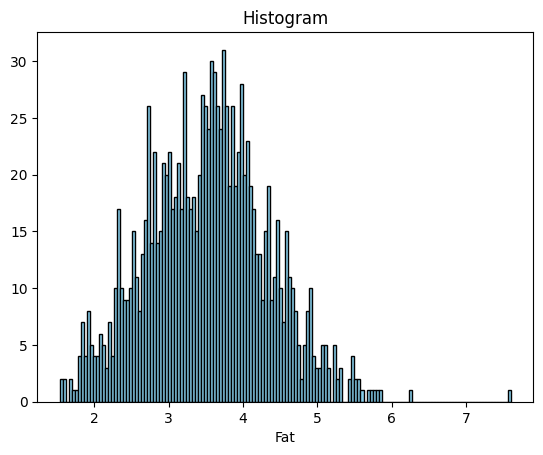

In [7]:


plt.hist(fat, bins=150, color='skyblue', edgecolor='black')  

plt.title('Histogram')
plt.xlabel('Fat')
plt.ylabel('')
plt.show()


# Remove outlier in boxplot

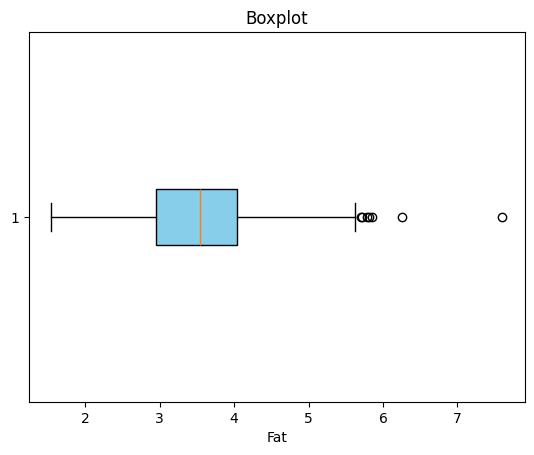

In [8]:


plt.boxplot(fat, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),)

plt.title('Boxplot')
plt.xlabel('Fat')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1de4478c580>,
 'caps': [<matplotlib.lines.Line2D at 0x1de4478cac0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1de4478c190>],
 'medians': [<matplotlib.lines.Line2D at 0x1de4478cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de447982e0>],
 'means': []}

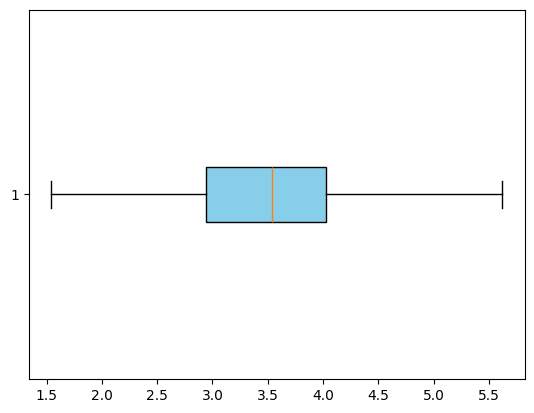

In [9]:
import numpy as np
Q1 = np.percentile(fat, 25)
Q3 = np.percentile(fat, 75)
IQR = Q3 - Q1
IQR

minn = Q1 - 1.5 * IQR
maxx = Q3 + 1.5 * IQR
a = (fat >= minn) & (fat <= maxx)
outlier = fat[(fat >= minn) & (fat <= maxx)]
plt.boxplot(outlier, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),)



In [10]:
# df_cleaned = df[a]
# df_cleaned
a

0       True
1       True
2       True
3       True
4       True
        ... 
1219    True
1220    True
1221    True
1222    True
1223    True
Name: Fat, Length: 1224, dtype: bool

In [11]:
pho_cleaned = pho[a]
pho_cleaned

array([[6.01846966, 5.88523573, 5.73625731, ..., 0.58506224, 0.5787037 ,
        0.55614973],
       [4.81175694, 4.67846058, 4.52717709, ..., 0.29875519, 0.28837209,
        0.26344086],
       [5.72739274, 5.59565217, 5.44177882, ..., 0.45228216, 0.44907407,
        0.42780749],
       ...,
       [5.37091394, 5.24042687, 5.09171598, ..., 0.41735537, 0.41203704,
        0.39037433],
       [5.73831776, 5.60037641, 5.45002957, ..., 0.45454545, 0.44907407,
        0.43085106],
       [5.30486991, 5.17252196, 5.02304965, ..., 0.41322314, 0.41203704,
        0.38829787]])

# Chứng minh các biến của phổ có tuyến tính vs fat và normalize


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pho_cleaned_standardized = scaler.fit_transform(pho_cleaned)

# pca = PCA(n_components=4)
# pho_cleaned_pca = pca.fit_transform(pho_cleaned_standardized)

outlier_standar = scaler.fit_transform(outlier.values.reshape(-1, 1))
print(pho_cleaned_standardized.shape)
print(outlier_standar.shape)

(1217, 256)
(1217, 1)


In [13]:
outlier_standar

array([[-0.91195491],
       [ 1.50781111],
       [-0.20249471],
       ...,
       [-0.13915005],
       [-0.08847432],
       [-0.41786656]])

# đưa về dataframe rồi concat lại và tính corelation matrix

In [14]:


df_pca = pd.DataFrame(pho_cleaned_standardized, columns=[f'Chieu{i+1}' for i in range(256)])
df_outlier = pd.DataFrame(outlier_standar, columns=['outlier'])

df_combined = pd.concat([df_pca, df_outlier], axis=1)

correlation_matrix = df_combined.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Chieu1    Chieu2    Chieu3    Chieu4    Chieu5    Chieu6  \
Chieu1    1.000000  0.999980  0.999963  0.999930  0.999889  0.999844   
Chieu2    0.999980  1.000000  0.999980  0.999959  0.999929  0.999894   
Chieu3    0.999963  0.999980  1.000000  0.999981  0.999963  0.999937   
Chieu4    0.999930  0.999959  0.999981  1.000000  0.999985  0.999971   
Chieu5    0.999889  0.999929  0.999963  0.999985  1.000000  0.999987   
...            ...       ...       ...       ...       ...       ...   
Chieu253  0.937945  0.938321  0.938681  0.939080  0.939582  0.940269   
Chieu254  0.937265  0.937631  0.938000  0.938396  0.938899  0.939597   
Chieu255  0.936848  0.937218  0.937582  0.937984  0.938485  0.939178   
Chieu256  0.935646  0.936026  0.936406  0.936822  0.937341  0.938047   
outlier  -0.812230 -0.812084 -0.811933 -0.811757 -0.811902 -0.812303   

            Chieu7    Chieu8    Chieu9   Chieu10  ...  Chieu248  Chieu249  \
Chieu1    0.999809  0.999783  0.999741

# lọc cột outlier (fat) rồi sắp xếp tăng dần rồi lấy 8 giá trị đầu tiên vì nó gần -1 nhất

In [15]:

outlier_correlation = correlation_matrix[['outlier']]

pd.set_option('display.max_rows', None)

sorted_outlier_correlation = outlier_correlation.sort_values(by='outlier')

closest_to_negative_one = sorted_outlier_correlation.head(8)

print(closest_to_negative_one)


           outlier
Chieu256 -0.893847
Chieu255 -0.892220
Chieu254 -0.891451
Chieu253 -0.890959
Chieu252 -0.890691
Chieu251 -0.890009
Chieu250 -0.889392
Chieu249 -0.888928


In [16]:
# lấy index
columns_closest_to_negative_one = closest_to_negative_one.index

columns_to_include = columns_closest_to_negative_one.tolist() + ['outlier']


columns_to_include


['Chieu256',
 'Chieu255',
 'Chieu254',
 'Chieu253',
 'Chieu252',
 'Chieu251',
 'Chieu250',
 'Chieu249',
 'outlier']

In [17]:
correlation_matrix_subset = correlation_matrix.loc[columns_to_include, columns_to_include[::-1]]
correlation_matrix_subset

,outlier,Chieu249,Chieu250,Chieu251,Chieu252,Chieu253,Chieu254,Chieu255,Chieu256
Chieu256,-0.893847,0.999346,0.999368,0.999400,0.999399,0.999322,0.999360,0.999314,1.000000
Chieu255,-0.892220,0.999562,0.999630,0.999641,0.999660,0.999658,0.999656,1.000000,0.999314
Chieu254,-0.891451,0.999670,0.999718,0.999722,0.999750,0.999719,1.000000,0.999656,0.999360
Chieu253,-0.890959,0.999720,0.999763,0.999770,0.999764,1.000000,0.999719,0.999658,0.999322
Chieu252,-0.890691,0.999814,0.999827,0.999827,1.000000,0.999764,0.999750,0.999660,0.999399
Chieu251,-0.890009,0.999849,0.999859,1.000000,0.999827,0.999770,0.999722,0.999641,0.999400
Chieu250,-0.889392,0.999876,1.000000,0.999859,0.999827,0.999763,0.999718,0.999630,0.999368
Chieu249,-0.888928,1.000000,0.999876,0.999849,0.999814,0.999720,0.999670,0.999562,0.999346
outlier,1.000000,-0.888928,-0.889392,-0.890009,-0.890691,-0.890959,-0.891451,-0.892220,-0.893847


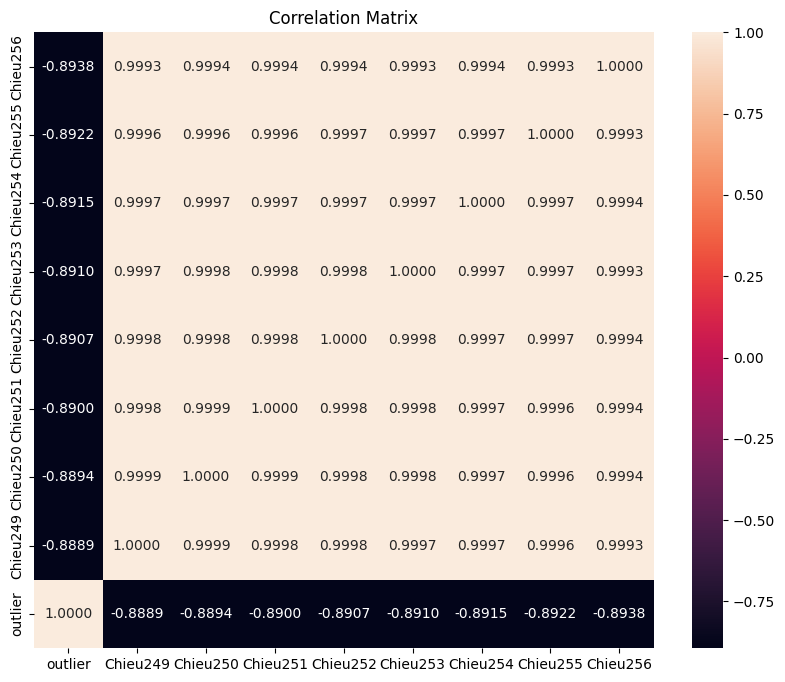

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix_subset, annot=True, fmt='.4f') 
plt.title('Correlation Matrix')
plt.show()


# feature selection

In [19]:
from sklearn.feature_selection import VarianceThreshold
# nó sẽ loại bỏ những feature có variance nhỏ hơn 0.1
selector = VarianceThreshold(threshold=0.1)

pho_cleaned_high_variance = selector.fit_transform(pho_cleaned_standardized)

print(f"Số lượng feature trước khi loại bỏ: {pho_cleaned_standardized.shape[1]}")
print(f"Số lượng feature sau khi loại bỏ: {pho_cleaned_high_variance.shape[1]}")

Số lượng feature trước khi loại bỏ: 256
Số lượng feature sau khi loại bỏ: 256


# LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = pho_cleaned_standardized 
y = outlier_standar 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")


MSE: 0.011121929331610459


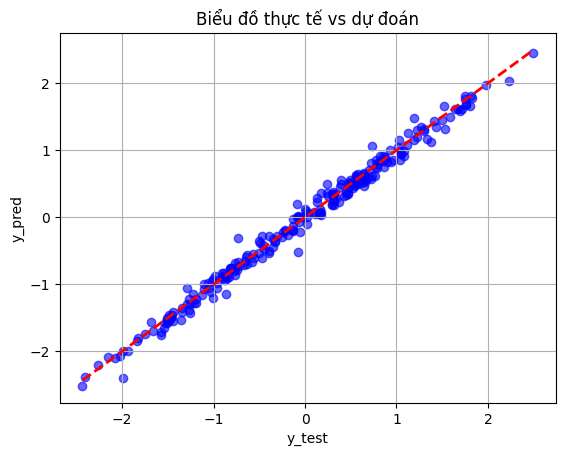

In [25]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Biểu đồ thực tế vs dự đoán")
plt.grid(True)
plt.show()


